<a href="https://colab.research.google.com/github/PratibhaSanganmath/Demand-prediction-for-public-transport-/blob/main/Demand_Prediction_for_Public_Transport_4_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

##Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Copy of train_revised.csv')

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UDC10CXGYF,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000



There are total 61 unique seats in this dataset.

travelers have used 2 types of payment method and most of the people have used Mpesa to pay for their ticket.

The record of 149 unique days are present in this dataset out of 2 years.

There are 2 different types of car used and most of them are bus.

In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df.shape

(51645, 10)

In [ ]:
# duplicate
len(df[df.duplicated()])

0

In [ ]:
df['ride_id'].unique

<bound method Series.unique of 0         1442
1         5437
2         5710
3         5777
4         5778
         ...  
51640    13826
51641    13809
51642    13809
51643    13796
51644    14304
Name: ride_id, Length: 51645, dtype: int64>

In [6]:
seats_sold_on_each_ride=pd.DataFrame(df['ride_id'].value_counts())
seats_sold_on_each_ride

,ride_id
8454,50
8090,49
10834,49
11382,49
13211,49
...,...
5804,1
9834,1
9738,1
11755,1


In [7]:
ride_id_dict = dict() 
for ride_id in df['ride_id']:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [8]:
ride_id_dict

{1442: 1,
 5437: 1,
 5710: 1,
 5777: 5,
 5778: 31,
 5781: 26,
 5784: 1,
 5789: 1,
 5790: 2,
 5791: 1,
 5792: 1,
 5793: 1,
 5794: 2,
 5795: 1,
 5796: 2,
 5797: 3,
 5798: 1,
 5800: 2,
 5801: 11,
 5802: 3,
 5803: 11,
 5804: 1,
 5808: 2,
 5809: 1,
 5810: 1,
 5811: 1,
 5812: 1,
 5816: 1,
 5817: 1,
 5822: 1,
 5823: 2,
 5824: 1,
 5825: 1,
 5826: 1,
 5830: 1,
 5834: 1,
 5835: 2,
 5836: 1,
 5837: 1,
 5838: 1,
 5839: 1,
 5840: 1,
 5844: 1,
 5845: 1,
 5849: 1,
 5850: 1,
 5851: 1,
 5852: 1,
 5853: 1,
 5856: 11,
 5857: 4,
 5858: 11,
 5861: 1,
 5862: 1,
 5863: 1,
 5864: 1,
 5867: 9,
 5868: 6,
 5873: 1,
 5874: 5,
 5875: 3,
 5876: 1,
 5878: 2,
 5880: 11,
 5881: 1,
 5882: 4,
 5886: 1,
 5887: 1,
 5888: 1,
 5889: 1,
 5890: 1,
 5894: 11,
 5897: 11,
 5898: 1,
 5899: 1,
 5901: 11,
 5902: 5,
 5910: 11,
 5918: 1,
 5919: 1,
 5920: 1,
 5921: 1,
 5922: 1,
 5923: 1,
 5924: 1,
 5925: 1,
 5928: 1,
 5929: 8,
 5931: 1,
 5933: 1,
 5940: 1,
 5941: 3,
 5942: 1,
 5943: 1,
 5944: 1,
 5945: 1,
 5946: 1,
 5947: 11,
 5950: 1

In [9]:
df.drop_duplicates(inplace=True)
df.reset_index(drop= True, inplace=True)

In [10]:
df['number_of_ticket_sold']= np.zeros(len(df))

In [11]:
for i in range(len(df)):
    ride_id = df.loc[i]["ride_id"]
    df.at[i,'number_of_ticket_sold'] = ride_id_dict[ride_id]

In [ ]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket_sold
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,1.0
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49,29.0
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49,29.0
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49,27.0


In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket_sold
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


In [ ]:
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket_sold
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,1.0
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49,29.0
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49,29.0
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49,27.0
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49,1.0


Text(0.5, 1.0, 'Show the number of seat during the period')

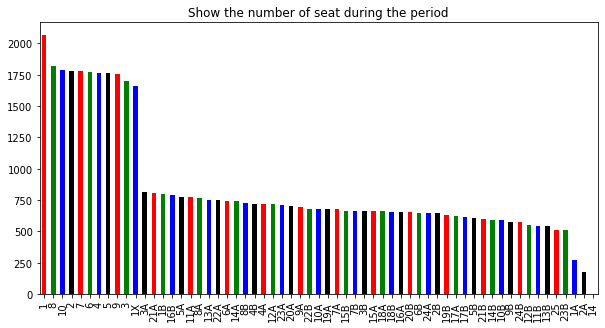

In [ ]:
plt.subplots(figsize=(10,5))
df.seat_number.value_counts().plot(kind='bar',color= ['r','g','b','k'])
plt.title('Show the number of seat during the period')

In [12]:
numeric_features = df.describe().columns
numeric_features

Index(['ride_id', 'max_capacity', 'number_of_ticket_sold'], dtype='object')

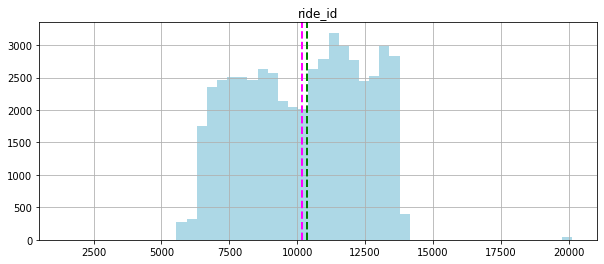

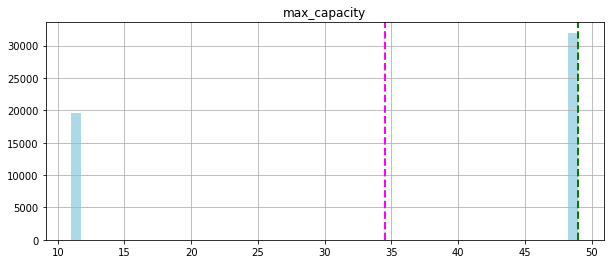

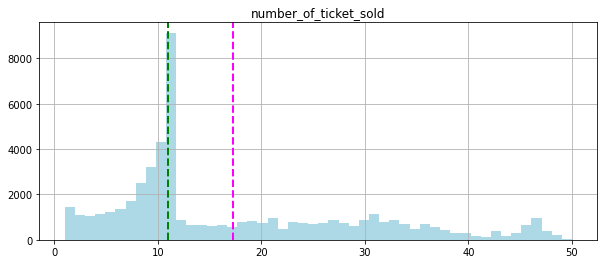

In [13]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(10, 4))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax,color='lightblue')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [14]:
categorical_features = df.describe(include=['object','category']).columns

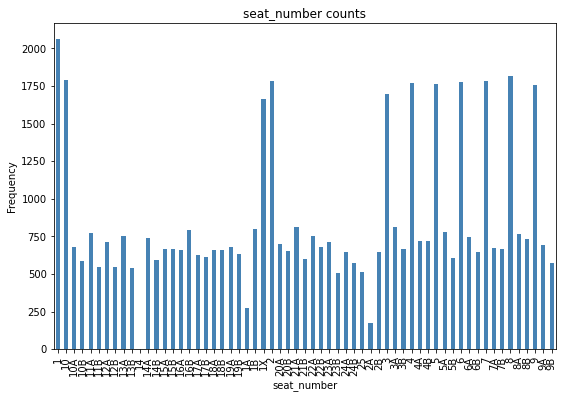

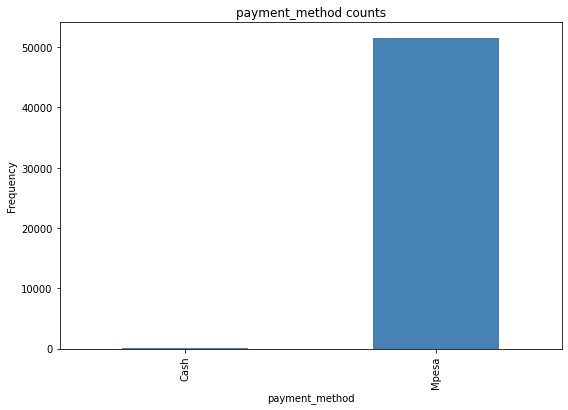

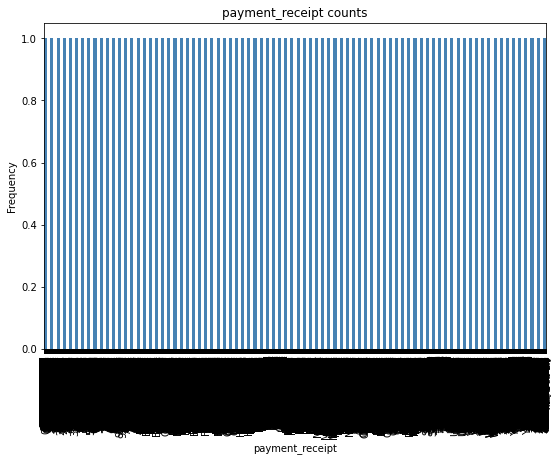

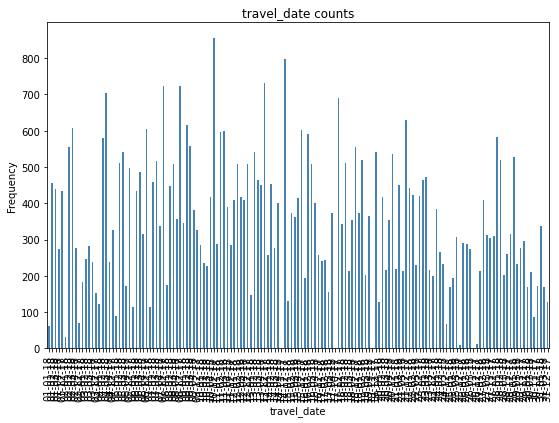

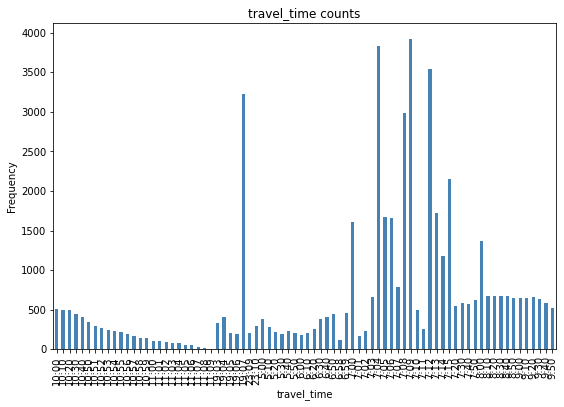

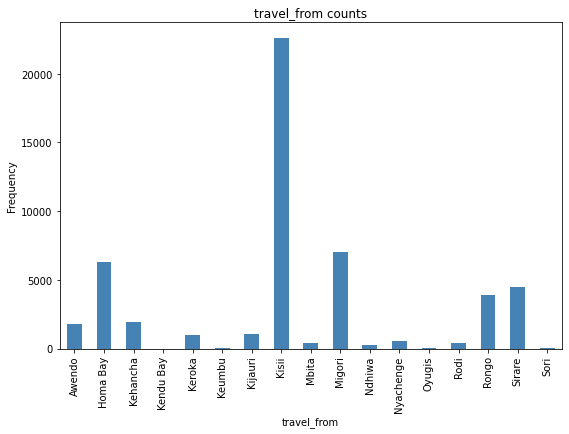

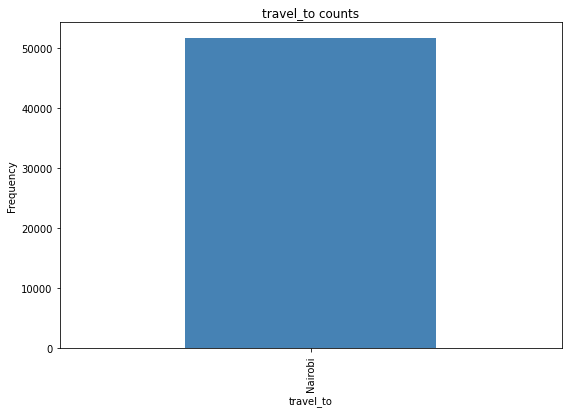

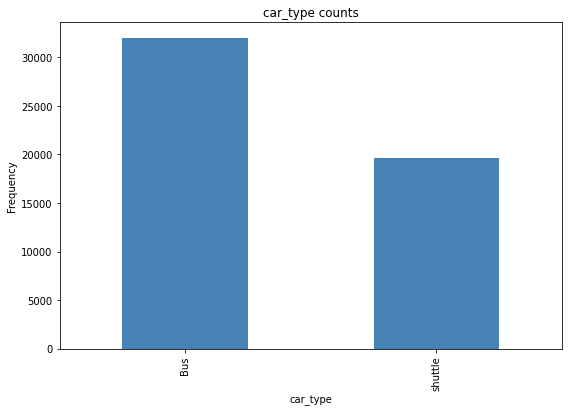

In [ ]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
df['car_type'].unique()

array(['Bus', 'shuttle'], dtype=object)

Text(0.5, 1.0, 'date of travel')

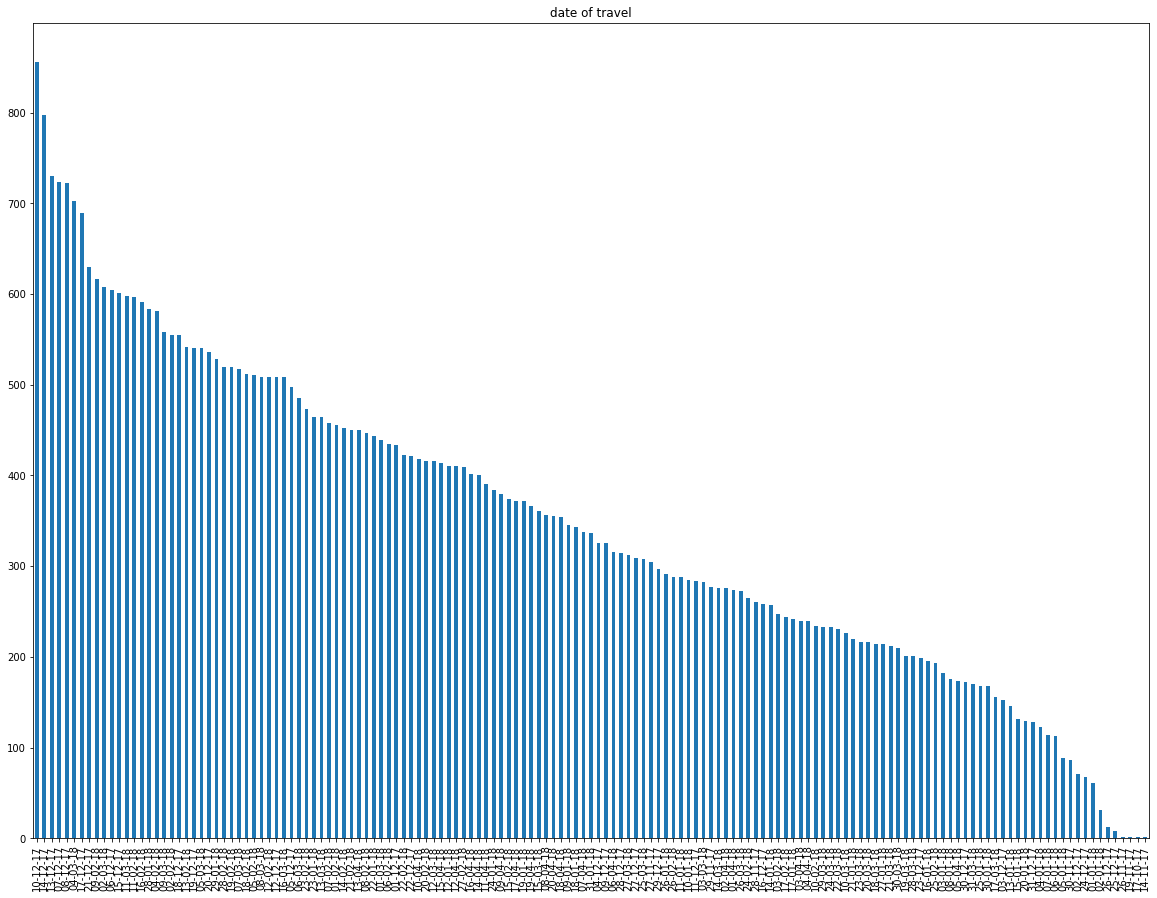

In [ ]:
plt.subplots(figsize=(20,15))
df.travel_date.value_counts().plot(kind='bar',color=['yellow','pink','blue','brown'])
plt.title('date of travel')

Text(0.5, 1.0, 'travelling from')

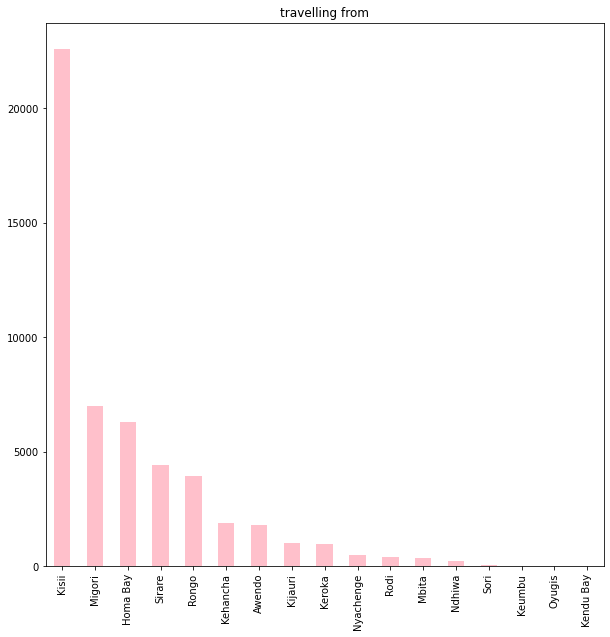

In [ ]:
plt.subplots(figsize=(10,10))
df.travel_from.value_counts().plot(kind='bar',color='pink')
plt.title('travelling from')

In [ ]:
df['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

In [ ]:
df.travel_from.value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

Text(0.5, 1.0, 'car_type')

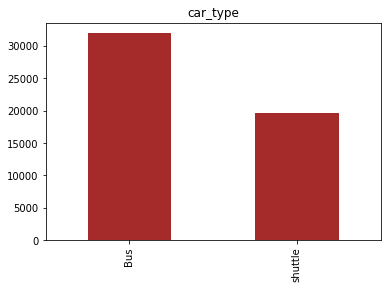

In [ ]:
df.car_type.value_counts().plot(kind='bar',color='brown')
plt.title('car_type')

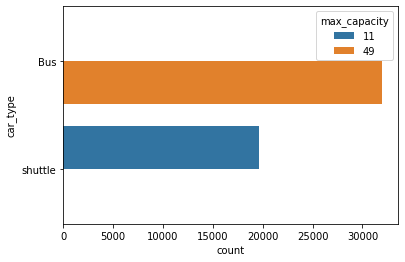

In [ ]:
sns.countplot(y=df['car_type'], hue=df['max_capacity'])

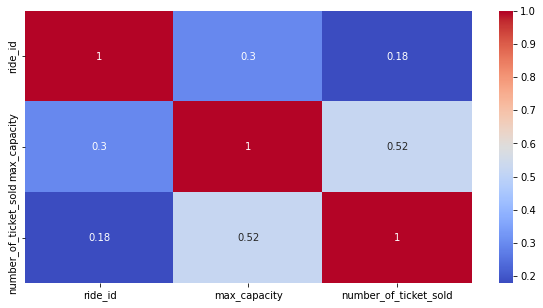

In [ ]:
 # Correlation
plt.figure(figsize=(10,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket_sold
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN,NaN
top,NaN,1,Mpesa,FIYGXWKCRM,10-12-17,7:09,Kisii,Nairobi,Bus,NaN,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321,17.280918
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193,12.375598
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,1.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,9.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,11.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,26.000000


In [15]:
seats_sold_on_each_ride=pd.DataFrame(df['ride_id'].value_counts())
seats_sold_on_each_ride


,ride_id
8454,50
8090,49
10834,49
11382,49
13211,49
...,...
5804,1
9834,1
9738,1
11755,1


In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'number_of_ticket_sold'],
      dtype='object')

In [16]:
dependent_variable = 'number_of_ticket_sold'
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['travel_time',
 'travel_to',
 'seat_number',
 'car_type',
 'payment_receipt',
 'travel_from',
 'ride_id',
 'payment_method',
 'travel_date',
 'max_capacity']

In [ ]:
df[independent_variables]

,travel_from,max_capacity,payment_method,travel_time,travel_to,seat_number,travel_date,payment_receipt,ride_id,car_type
0,Migori,49,Mpesa,7:15,Nairobi,15A,17-10-17,UZUEHCBUSO,1442,Bus
1,Migori,49,Mpesa,7:12,Nairobi,14A,19-11-17,TIHLBUSGTE,5437,Bus
2,Keroka,49,Mpesa,7:05,Nairobi,8B,26-11-17,EQX8Q5G19O,5710,Bus
3,Homa Bay,49,Mpesa,7:10,Nairobi,19A,27-11-17,SGP18CL0ME,5777,Bus
4,Migori,49,Mpesa,7:12,Nairobi,11A,27-11-17,BM97HFRGL9,5778,Bus
...,...,...,...,...,...,...,...,...,...,...
51640,Awendo,49,Mpesa,8:00,Nairobi,9B,20-04-18,8V2XDDZR6V,13826,Bus
51641,Migori,49,Mpesa,8:00,Nairobi,18A,20-04-18,4PEBSVJSNK,13809,Bus
51642,Migori,49,Mpesa,8:00,Nairobi,17A,20-04-18,LVN64LZDNN,13809,Bus
51643,Awendo,49,Mpesa,7:08,Nairobi,16B,20-04-18,REYBSKTYWN,13796,Bus


In [17]:
## Adding new column name is number_of_ticket
label=df.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
label.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [ ]:
## New shape of the data after adding new column
df.shape

(51645, 11)

In [ ]:
df = df.merge(label, how="left",on="ride_id")
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket_sold,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0,31


In [18]:
#removing some features that doesn't seem to be important for predicting the number of tickets in our mode

df = df.drop(['seat_number','payment_method','payment_receipt'], axis=1)

In [19]:
## Removing the constant feature

df.drop(["travel_to"],axis=1,inplace=True)

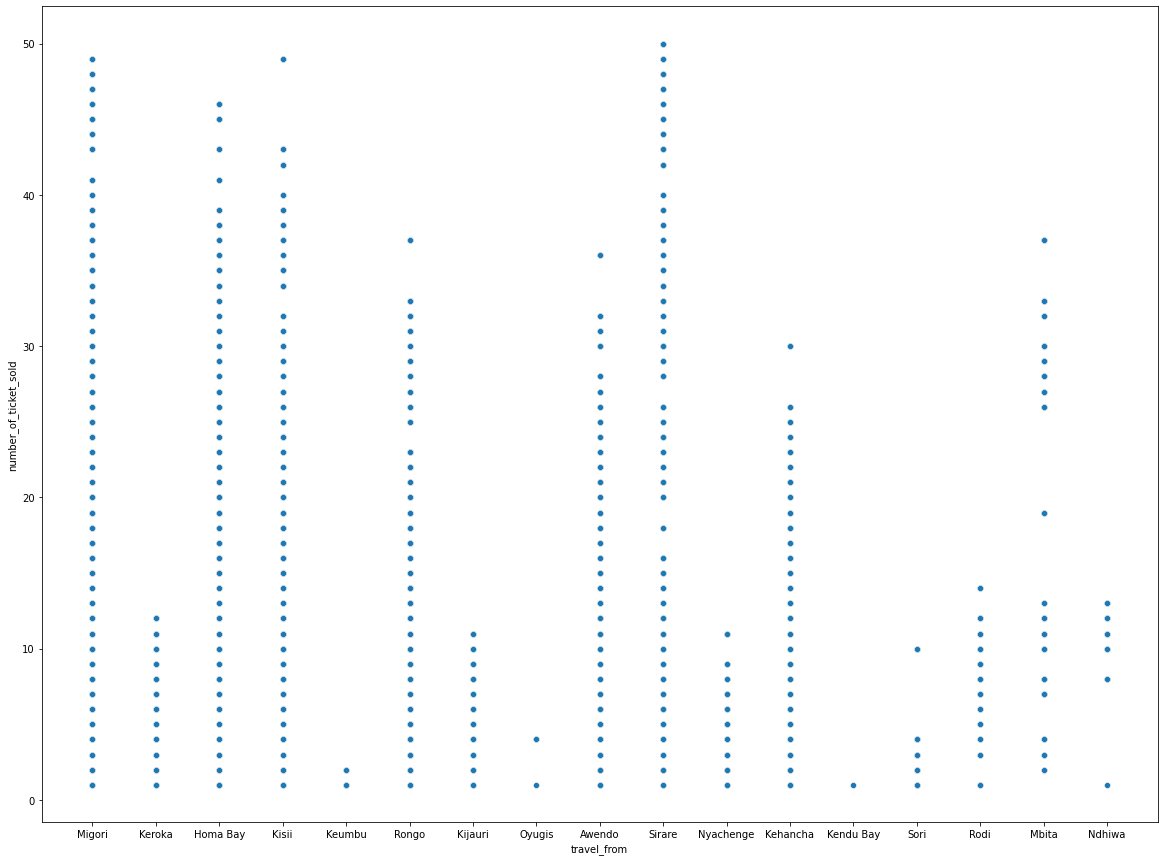

In [25]:
plt.figure(figsize=(20, 15))

sp = sns.scatterplot(x="travel_from", y="number_of_ticket_sold", data=df)

## Feature Engineering

In [28]:
#concatinate travel date and travel time column and make a new feature called date.
df["date"]=df["travel_date"]+ " "+df["travel_time"]

In [30]:
df['date']

0        17-10-17 7:15
1        19-11-17 7:12
2        26-11-17 7:05
3        27-11-17 7:10
4        27-11-17 7:12
             ...      
51640    20-04-18 8:00
51641    20-04-18 8:00
51642    20-04-18 8:00
51643    20-04-18 7:08
51644    14-11-17 5:10
Name: date, Length: 51645, dtype: object

In [31]:
def  time_features(df1): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df1["date"]=pd.to_datetime(df1["date"])
  df1["day_of_week"]=df1["date"].dt.dayofweek
  df1["day_of_year"]=df1["date"].dt.dayofyear
  df1["day_of_month"]=df1["date"].dt.day
  df1["year_woy"]=df1["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df1["hour"]=df1["date"].dt.hour
  df1["minute"]=df1["date"].dt.minute
  df1["is_weekend"]=df1["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df1["year"]=df1["date"].dt.year
  df1["quarter"]=df1["date"].dt.quarter
  df1["month"]=df1["date"].dt.month
  return df1

In [33]:
dataset_new = time_features(df)

In [34]:
dataset_new.head() #prints top 5 rows of the dataframe

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket_sold,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5.0,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31.0,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


In [41]:
dataset_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket_sold', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month'],
      dtype='object')

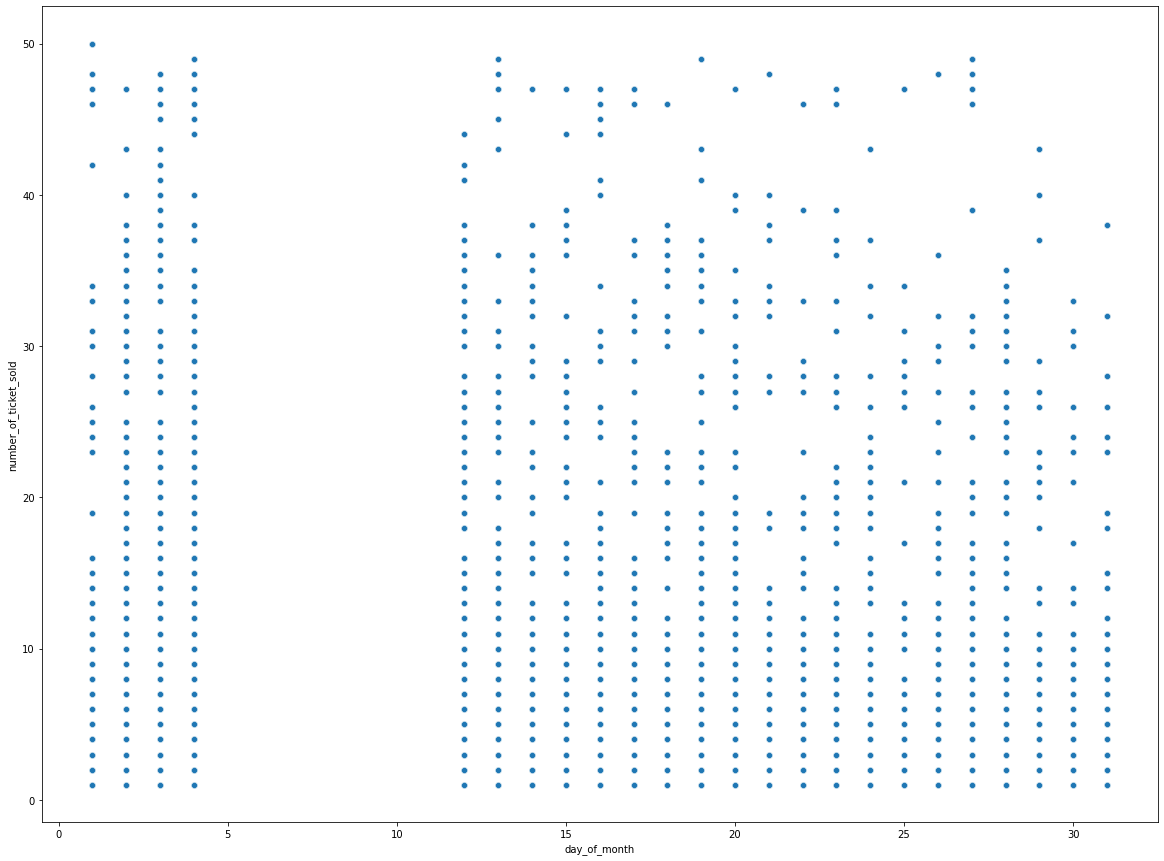

In [42]:

plt.figure(figsize=(20, 15))

sns.scatterplot(x='day_of_month', y="number_of_ticket_sold", data=dataset_new)

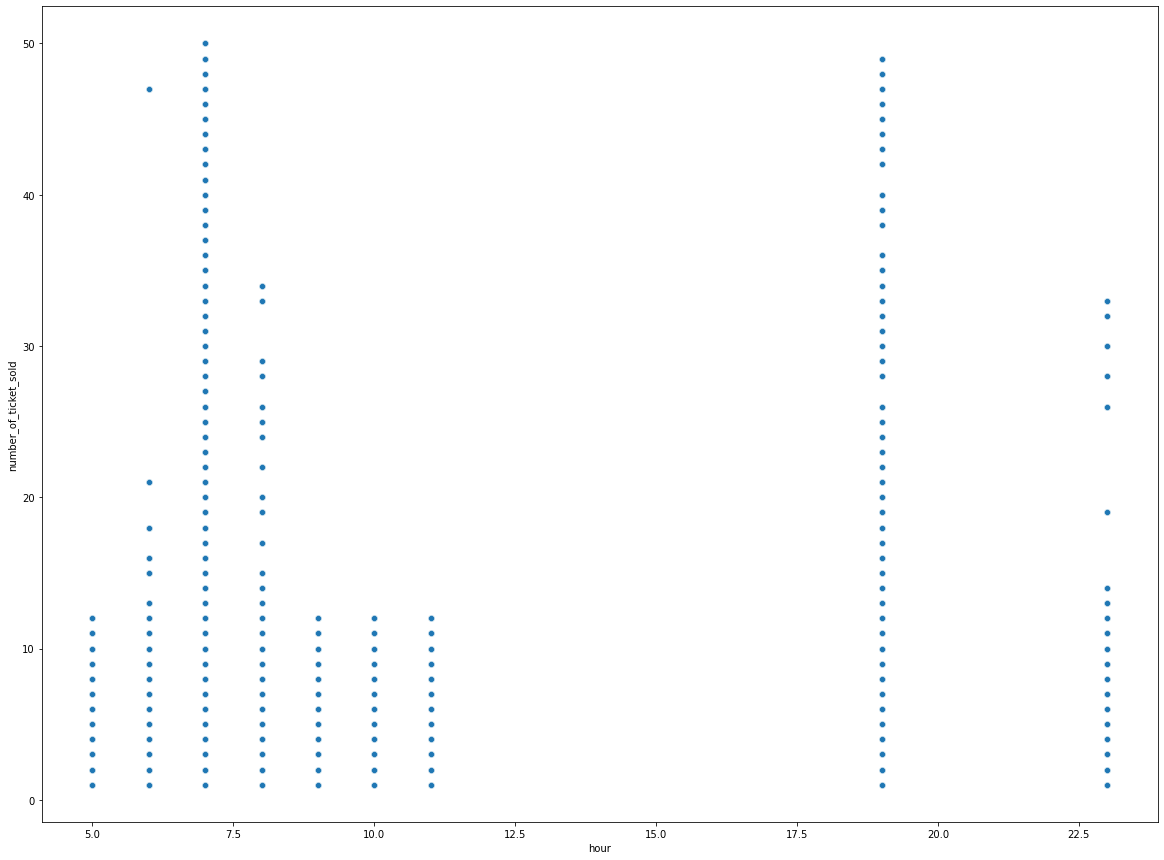

In [43]:

plt.figure(figsize=(20, 15))

sns.scatterplot(x='hour', y="number_of_ticket_sold", data=dataset_new)

We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

From the above we can say that there is not ride between 12pm to 5.30Pm

In [44]:
dataset_new["travel_time"] = dataset_new["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [45]:
dataset_new['period'] = np.nan

dataset_new.loc[dataset_new.travel_time < 7, 'period'] = 'em'
dataset_new.loc[(dataset_new.travel_time >= 7) & (dataset_new.travel_time < 11), 'period'] = 'am'
dataset_new.loc[(dataset_new.travel_time >= 11) & (dataset_new.travel_time < 15), 'period'] = 'mid'
dataset_new.loc[(dataset_new.travel_time >= 15) & (dataset_new.travel_time < 19), 'period'] = 'eve'
dataset_new.loc[(dataset_new.travel_time >= 19) & (dataset_new.travel_time <= 24), 'period'] = 'pm'


pcount = dict(dataset_new['period'].value_counts())
pcount


dataset_new['hourly_travelers'] = np.log1p(dataset_new['period'].map(pcount))



dcount = dict(dataset_new["day_of_year"].value_counts())
dataset_new["daily_travelers"] = np.log1p(dataset_new["day_of_year"].map(dcount))
dataset_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket_sold,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,am,10.65046,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,am,10.65046,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,am,10.65046,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5.0,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,am,10.65046,5.723585
4,5778,27-11-17,7.200000,Migori,Bus,49,31.0,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,am,10.65046,5.723585


In [46]:
dataset_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket_sold', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'period', 'hourly_travelers',
       'daily_travelers'],
      dtype='object')

In [47]:
new_cols = ['day_of_year','daily_travelers','minute','day_of_month','hourly_travelers','is_weekend','day_of_week']

In [48]:
transport_dataset=dataset_new.copy()

In [49]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket_sold,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,am,10.65046,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,am,10.65046,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,am,10.65046,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5.0,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,am,10.65046,5.723585
4,5778,27-11-17,7.200000,Migori,Bus,49,31.0,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,am,10.65046,5.723585


In [50]:
transport_dataset.shape

(51645, 21)

In [51]:
transport_dataset.month.value_counts()

12    9516
2     8211
1     7278
3     6097
4     5086
11    3089
9     2225
8     2210
7     2150
10    2020
6     1953
5     1810
Name: month, dtype: int64

In [52]:
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
transport_dataset['month'].replace(dict_cov,inplace=True)

In [53]:
transport_dataset.month.value_counts()

1    25005
3    18465
2     8175
Name: month, dtype: int64

In [54]:
transport_dataset.day_of_month.unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1])

In [55]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
transport_dataset['day_of_month'].replace(conv_dict,inplace=True)

In [56]:
transport_dataset['day_of_month'].value_counts()

1    20840
2    19778
3    11027
Name: day_of_month, dtype: int64

In [57]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket_sold,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1.0,2017-10-17 07:15:00,1,290,2,201742,7,15,0,2017,4,3,am,10.65046,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1.0,2017-11-19 07:12:00,6,323,2,201746,7,12,1,2017,4,2,am,10.65046,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1.0,2017-11-26 07:05:00,6,330,3,201747,7,5,1,2017,4,2,am,10.65046,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5.0,2017-11-27 07:10:00,0,331,3,201748,7,10,0,2017,4,2,am,10.65046,5.723585
4,5778,27-11-17,7.200000,Migori,Bus,49,31.0,2017-11-27 07:12:00,0,331,3,201748,7,12,0,2017,4,2,am,10.65046,5.723585


In [58]:

# Let us find the difference between next and previous buses
# And count the travel per minut trip
def find_difference_bw_bus(data):
  
  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")

  
  return data

In [59]:
data = find_difference_bw_bus(transport_dataset)

In [60]:
data.isnull().sum()

ride_id                           0
travel_date                       0
travel_time                       0
travel_from                       0
car_type                          0
max_capacity                      0
number_of_ticket_sold             0
date                              0
day_of_week                       0
day_of_year                       0
day_of_month                      0
year_woy                          0
hour                              0
minute                            0
is_weekend                        0
year                              0
quarter                           0
month                             0
period                            0
hourly_travelers                  0
daily_travelers                   0
Time_gap_btw_0_1_next_bus         1
Time_gap_btw_0_1_previous_bus     1
Time_gap_btw_0_2_next_bus         1
Time_gap_btw_0_2_previous_bus     1
Time_gap_btw_0_3_next_bus         1
Time_gap_btw_0_3_previous_bus     1
Time_gap_btw_next_previous_b

In [61]:
data.dropna(inplace=True)

In [62]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket_sold,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
2152,6654,05-12-17,7.133333,Awendo,Bus,49,2.0,2017-05-12 07:08:00,4,132,1,201719,7,8,0,2017,2,3,am,10.65046,6.212606,0.0,0.0,-5688.0,5688.0,-5688.0,5688.0,5688.0
2153,6654,05-12-17,7.133333,Awendo,Bus,49,2.0,2017-05-12 07:08:00,4,132,1,201719,7,8,0,2017,2,3,am,10.65046,6.212606,-5688.0,0.0,-5688.0,5688.0,-5688.0,5688.0,5688.0
44611,12926,01-04-18,7.133333,Awendo,Bus,49,20.0,2018-01-04 07:08:00,3,4,1,20181,7,8,0,2018,1,1,am,10.65046,5.616771,0.0,5688.0,0.0,5688.0,0.0,5688.0,5688.0
44637,12926,01-04-18,7.133333,Awendo,Bus,49,20.0,2018-01-04 07:08:00,3,4,1,20181,7,8,0,2018,1,1,am,10.65046,5.616771,0.0,0.0,0.0,5688.0,0.0,5688.0,0.0
44638,12926,01-04-18,7.133333,Awendo,Bus,49,20.0,2018-01-04 07:08:00,3,4,1,20181,7,8,0,2018,1,1,am,10.65046,5.616771,0.0,0.0,0.0,0.0,0.0,5688.0,0.0


In [63]:
from datetime import datetime
from datetime import timedelta

Now let us find the distance of each origin point from the distination point. I used Nirobi Map to estimate the distance from origin point to destination map.

In [64]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
data["travel_from_distance"]=data.travel_from.map(distance)

In [65]:

time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
data["travel_from_time"]=data.travel_from.map(time)

In [66]:
data["Speed"]=data.travel_from_time/data.travel_from_distance

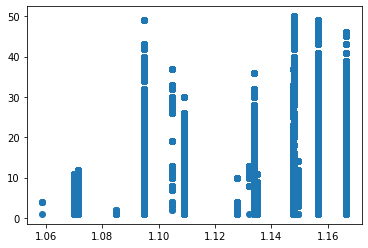

In [68]:
plt.scatter(data['Speed'],data['number_of_ticket_sold'])

In [69]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in time.keys(): 
    time[key]=timedelta( minutes=time[key])

#find the date of traveling from origin 
data["Date_of_traveling_from_origin"]=data.travel_from.map(time)

# find the date of arrival at distination
data["arrival_date"]=data.date+ data.Date_of_traveling_from_origin
data["hod_arrived_date"]=data["arrival_date"].dt.hour
data["minute_arrived_date"]=data["arrival_date"].dt.minute
del data["Date_of_traveling_from_origin"],data["arrival_date"]
data["is_rush_hour"]=0
data.loc[data.hod_arrived_date.between(7,17),"is_rush_hour"]=1

##  Encoding Categorical features

In [70]:
from sklearn import preprocessing #Import LabelEncoder
data = pd.get_dummies(data, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
data.replace(label_enc,inplace=True)

In [71]:
data.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket_sold,date,day_of_week,day_of_year,year_woy,hour,minute,is_weekend,year,quarter,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus,travel_from_distance,travel_from_time,Speed,hod_arrived_date,minute_arrived_date,is_rush_hour,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
2152,6654,05-12-17,7.133333,1,49,2.0,2017-05-12 07:08:00,4,132,201719,7,8,0,2017,2,am,10.65046,6.212606,0.0,0.0,-5688.0,5688.0,-5688.0,5688.0,5688.0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2153,6654,05-12-17,7.133333,1,49,2.0,2017-05-12 07:08:00,4,132,201719,7,8,0,2017,2,am,10.65046,6.212606,-5688.0,0.0,-5688.0,5688.0,-5688.0,5688.0,5688.0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
44611,12926,01-04-18,7.133333,1,49,20.0,2018-01-04 07:08:00,3,4,20181,7,8,0,2018,1,am,10.65046,5.616771,0.0,5688.0,0.0,5688.0,0.0,5688.0,5688.0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
44637,12926,01-04-18,7.133333,1,49,20.0,2018-01-04 07:08:00,3,4,20181,7,8,0,2018,1,am,10.65046,5.616771,0.0,0.0,0.0,5688.0,0.0,5688.0,0.0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
44638,12926,01-04-18,7.133333,1,49,20.0,2018-01-04 07:08:00,3,4,20181,7,8,0,2018,1,am,10.65046,5.616771,0.0,0.0,0.0,0.0,0.0,5688.0,0.0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


## Training the models

In [75]:
keys= ["ride_id"]
Target_name="number_of_ticket_sold"
not_used_cols=["ride_id","travel_time" ,"travel_date","date",'year_woy','max_capacity','number_of_ticket_sold',
               'period'
]

In [76]:
features = data.drop(not_used_cols,axis=1).columns

In [77]:
features

Index(['car_type', 'day_of_week', 'day_of_year', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'hourly_travelers', 'daily_travelers',
       'Time_gap_btw_0_1_next_bus', 'Time_gap_btw_0_1_previous_bus',
       'Time_gap_btw_0_2_next_bus', 'Time_gap_btw_0_2_previous_bus',
       'Time_gap_btw_0_3_next_bus', 'Time_gap_btw_0_3_previous_bus',
       'Time_gap_btw_next_previous_bus', 'travel_from_distance',
       'travel_from_time', 'Speed', 'hod_arrived_date', 'minute_arrived_date',
       'is_rush_hour', 'travel_from_Awendo', 'travel_from_Homa Bay',
       'travel_from_Kehancha', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori', 'day_of_month_1',
       'day_of_month_2', 'day_of_month_3', 'month_1', 'month_2', 'month_3'

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [79]:
data[features].head()

,car_type,day_of_week,day_of_year,hour,minute,is_weekend,year,quarter,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus,travel_from_distance,travel_from_time,Speed,hod_arrived_date,minute_arrived_date,is_rush_hour,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
2152,1,4,132,7,8,0,2017,2,10.65046,6.212606,0.0,0.0,-5688.0,5688.0,-5688.0,5688.0,5688.0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2153,1,4,132,7,8,0,2017,2,10.65046,6.212606,-5688.0,0.0,-5688.0,5688.0,-5688.0,5688.0,5688.0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
44611,1,3,4,7,8,0,2018,1,10.65046,5.616771,0.0,5688.0,0.0,5688.0,0.0,5688.0,5688.0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
44637,1,3,4,7,8,0,2018,1,10.65046,5.616771,0.0,0.0,0.0,5688.0,0.0,5688.0,0.0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
44638,1,3,4,7,8,0,2018,1,10.65046,5.616771,0.0,0.0,0.0,0.0,0.0,5688.0,0.0,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


## Linear Regression

In [80]:
import math
from sklearn.linear_model import LinearRegression

In [81]:
def print_metrics(actual, predicted):
    print('MSE is {}'.format(mean_squared_error(actual, predicted)))
    print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
    print('RMSE is {}'.format(r2_score(actual, predicted)))
    print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
    print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [83]:
used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in features:
      used_cols.append(col)
dataset_pr = data[used_cols]
X= dataset_pr.copy()
y = data['number_of_ticket_sold']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
  # Predicting 
y_pred = model.predict(X_test)
  #Find R-squared value
r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test,y_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(r2)
print('Important features are: \n')
used_cols

Adjust_r2: 0.5909876794970645
Train score: 0.5975137800137171
Test score: 0.5920916911590254
0.5920916911590254
Important features are: 



['day_of_year',
 'car_type',
 'day_of_week',
 'day_of_year',
 'hour',
 'minute',
 'is_weekend',
 'year',
 'quarter',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'Time_gap_btw_0_1_previous_bus',
 'Time_gap_btw_0_2_next_bus',
 'Time_gap_btw_0_2_previous_bus',
 'Time_gap_btw_0_3_next_bus',
 'Time_gap_btw_0_3_previous_bus',
 'Time_gap_btw_next_previous_bus',
 'travel_from_distance',
 'travel_from_time',
 'Speed',
 'hod_arrived_date',
 'minute_arrived_date',
 'is_rush_hour',
 'travel_from_Awendo',
 'travel_from_Homa Bay',
 'travel_from_Kehancha',
 'travel_from_Keroka',
 'travel_from_Keumbu',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Mbita',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Nyachenge',
 'travel_from_Oyugis',
 'travel_from_Rodi',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'travel_from_Sori',
 'day_of_month_1',
 'day_of_month_2',
 'day_of_month_3',
 'month_1',
 'month_2',
 'month_3']

In [84]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 62.09000699801619
RMSE is 7.879721251289045
RMSE is 0.5920916911590254
MAE is 5.647457712952088
MAPE is 72.96805754909713


## Implementing Lasso Regression

In [85]:
from sklearn.linear_model import Lasso

In [87]:
X= data[used_cols].copy()
y = data['number_of_ticket_sold']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
alphas = [0.01,0.025,0.5,0.75,1]
for alpha in alphas:
    lasso  = Lasso(alpha=alpha , max_iter= 3000)
    lasso.fit(X_train, y_train)
    print('alpha: ',alpha)
    print('test Score: ',lasso.score(X_test, y_test))
    print('train Score: ',lasso.score(X_train, y_train))

alpha:  0.01
test Score:  0.5915252891027203
train Score:  0.5960910473179789
alpha:  0.025
test Score:  0.5878156856504246
train Score:  0.5921583753904389
alpha:  0.5
test Score:  0.49560237007203944
train Score:  0.502360249837118
alpha:  0.75
test Score:  0.4852025232183821
train Score:  0.4921977254907891
alpha:  1
test Score:  0.48420915780397
train Score:  0.4912592667049088
